c:\programdata\anaconda3\envs\petersont\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


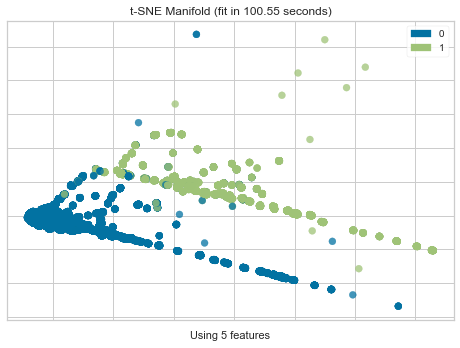

In [1]:
from yellowbrick.features import Manifold
from yellowbrick.datasets import load_occupancy

# Load the classification dataset
X, y = load_occupancy()

# Instantiate the visualizer
viz = Manifold(manifold="tsne", )

viz.fit_transform(X, y)  # Fit the data to the visualizer
viz.show()               # Finalize and render the figure

In [20]:
import sys
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, OrdinalEncoder, KBinsDiscretizer

try:
    import asdfasd
except ModuleNotFoundError:
    sys.path.append(
        "../../../mlmachine"
    ) if "../../../../mlmachine" not in sys.path else None
    sys.path.append(
        "../../../prettierplot"
    ) if "../../../../prettierplot" not in sys.path else None

    import mlmachine as mlm
    from mlmachine.data import titanic
    
    from mlmachine.features.preprocessing import (
        DataFrameSelector,
        PandasTransformer,
        ContextImputer,
        PandasFeatureUnion,
    )
    from prettierplot.plotter import PrettierPlot
    import prettierplot.style as style

df_train, df_valid = titanic()

mlmachine_demo = mlm.Machine(
    data=df_train,
    target="Survived",
    remove_features=["PassengerId","Ticket","Name"],
    identify_as_continuous=["Age","Fare"],
    identify_as_count=["Parch","SibSp"],
    identify_as_nominal=["Embarked","Cabin"],
    identify_as_ordinal=["Pclass"],
    ordinal_encodings = {"Pclass": [1, 2, 3]},
    is_classification=True,
)

# impute pipeline
impute_pipe = PandasFeatureUnion([
    ("age", make_pipeline(
        DataFrameSelector(include_columns=["Age"]),
        PandasTransformer(SimpleImputer(strategy="most_frequent"))
    )),
    ("embarked", make_pipeline(
        DataFrameSelector(include_columns=["Embarked"]),
        PandasTransformer(SimpleImputer(strategy="most_frequent"))
    )),
    ("cabin", make_pipeline(
        DataFrameSelector(include_columns=["Cabin"]),
        PandasTransformer(SimpleImputer(strategy="constant", fill_value="X"))
    )),
    ("diff", make_pipeline(
        DataFrameSelector(exclude_columns=["Age","Embarked","Cabin"])
    )),
])

mlmachine_demo.data = impute_pipe.fit_transform(mlmachine_demo.data)

# encode pipeline
encode_pipe = PandasFeatureUnion([
    ("nominal", make_pipeline(
        DataFrameSelector(
            include_mlm_dtypes=["nominal"],
            exclude_columns=["Cabin"]
        ),
        PandasTransformer(OneHotEncoder())
    )),
    ("ordinal", make_pipeline(
        DataFrameSelector(include_mlm_dtypes=["ordinal"]),
        PandasTransformer(
            OrdinalEncoder(categories=list(mlmachine_demo.ordinal_encodings.values()))
        )
    )),
    ("bin", make_pipeline(
        DataFrameSelector(include_mlm_dtypes=["continuous"]),
        PandasTransformer(KBinsDiscretizer(encode="ordinal"))
    )),
    ("diff", make_pipeline(
        DataFrameSelector(
            exclude_columns=[i for i in mlmachine_demo.data.mlm_dtypes["nominal"] if i != "Cabin"]\
            + list(mlmachine_demo.ordinal_encodings.keys())
        )
    )),
])

mlmachine_demo.data = encode_pipe.fit_transform(mlmachine_demo.data)
mlmachine_demo.update_dtypes()

>>> category label encoding

	0 --> 0
	1 --> 1



# impute 

In [ ]:
# impute pipeline
impute_pipe = PandasFeatureUnion([
    ("age", make_pipeline(
        DataFrameSelector(include_columns=["Age","Pclass"]),
        ContextImputer(null_col="Age", context_col="Pclass", strategy="mean")
    )),
    ("fare", make_pipeline(
        DataFrameSelector(include_columns=["Fare","Pclass"]),
        ContextImputer(null_col="Fare", context_col="Pclass")
    )),
    ("embarked", make_pipeline(
        DataFrameSelector(include_columns=["Embarked"]),
        PandasTransformer(SimpleImputer(strategy="most_frequent"))
    )),
    ("cabin", make_pipeline(
        DataFrameSelector(include_columns=["Cabin"]),
        PandasTransformer(SimpleImputer(strategy="constant", fill_value="X"))
    )),
    ("diff", make_pipeline(
        DataFrameSelector(exclude_columns=["Age","Fare","Embarked","Cabin"])
    )),
])

train.data = impute_pipe.fit_transform(train.data)
valid.data = impute_pipe.transform(valid.data)

# EDA

Feature summary,Feature vs. target summary,Target proportion
Age_binned_5,Count,Proportion
2,267,29.966330
3,189,21.212121
4,188,21.099888
0,164,18.406285
1,83,9.315376
Age_binned_5,Died,Survived
0,85,79
1,59,24
2,177,90


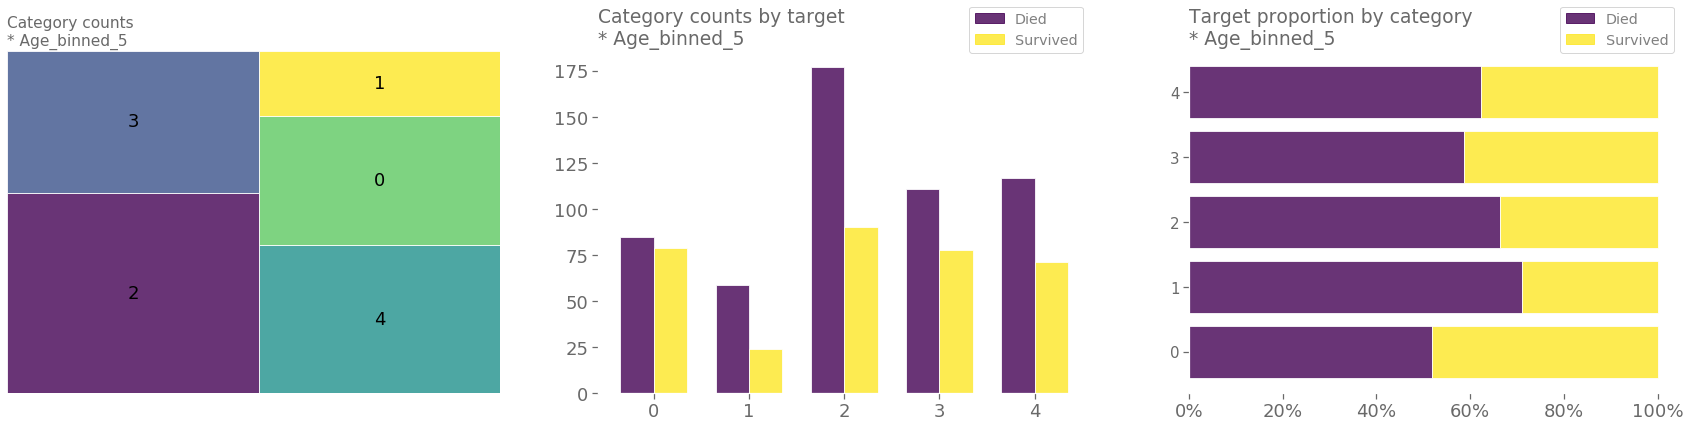

Feature summary,Feature vs. target summary,Target proportion
Fare_binned_5,Count,Proportion
2,195,21.885522
4,182,20.426487
3,175,19.640853
1,173,19.416386
0,166,18.630752
Fare_binned_5,Died,Survived
0,130,36
1,142,31
2,113,82


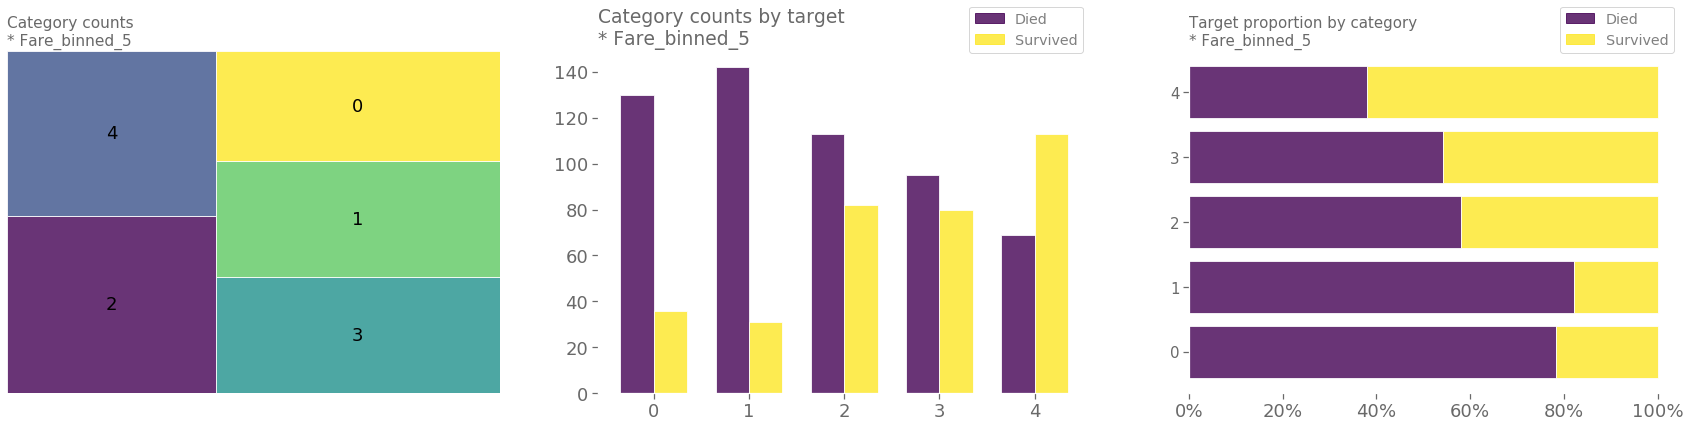

Feature summary Feature vs. target summary Target proportion 
 
 
 Pclass_ordinal_encoded 
 Count 
 Proportion 
 
 
 
 
 2 
 491 
 55.106622 
 
 
 0 
 216 
 24.242424 
 
 
 1 
 184 
 20.650954 
 
 
 
 
 
 Pclass_ordinal_encoded 
 Died 
 Survived 
 
 
 
 
 0 
 80 
 136 
 
 
 1 
 97 
 87 
 
 
 2 
 372 
 119 
 
 
 
 
 
 Class 
 0 
 1 
 2 
 
 
 
 
 Died 
 37.037037 
 52.717391 
 75.763747 
 
 
 Survived 
 62.962963 
 47.282609 
 24.236253

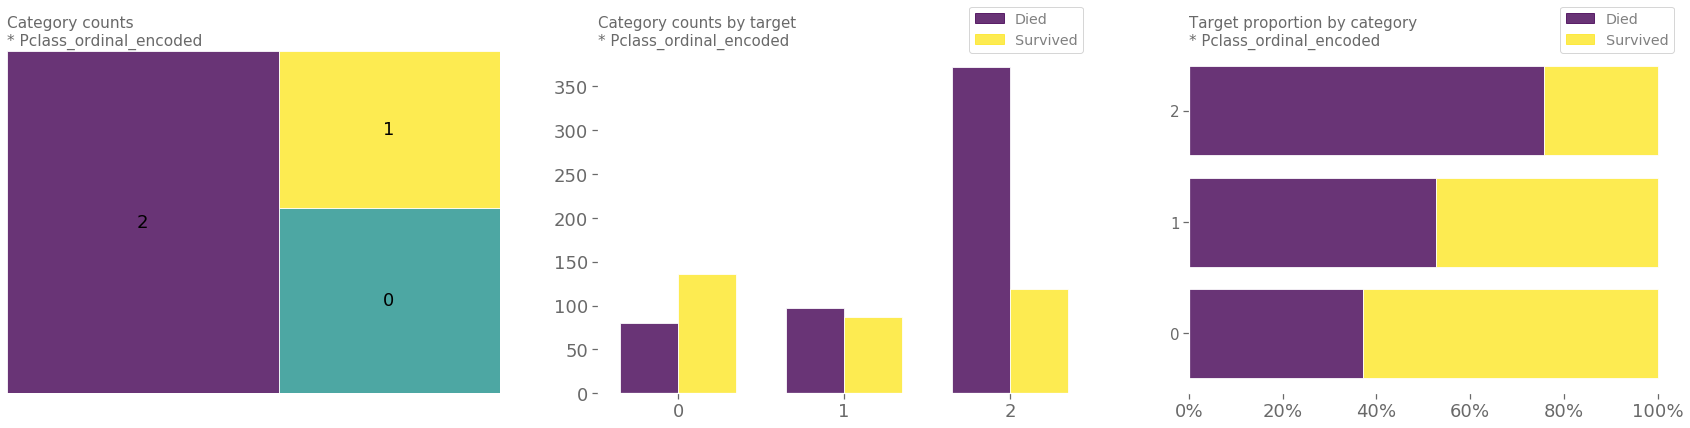

In [25]:
# number features
for feature in mlmachine_demo.data.mlm_dtypes["ordinal"]:
    mlmachine_demo.eda_cat_target_cat_feat(
        feature=feature,
        legend_labels=["Died","Survived"],
    )

## Count feature EDA

<a id = 'Count-feature-EDA'></a>

In [ ]:
# number features
for feature in mlmachine_demo.data.mlm_dtypes["count"]:
    mlmachine_demo.eda_cat_target_cat_feat(
        feature=feature,
        level_count_cap=10,
        legend_labels=["Died","Survived"],
        chart_scale=15
    )

## Continuous feature EDA

<a id = 'Continuous-feature-EDA'></a>

In [ ]:
mlmachine_demo.eda_cat_target_num_feat(
    feature="Age",
    legend_labels=["Died","Survived"],
)

##### Correlation

In [ ]:
# correlation heat map
p = PrettierPlot()
ax = p.make_canvas()
p.corr_heatmap(
    df=mlmachine_demo.recombine_data(),
#     df=train.data,
    annot=True,
    ax=ax,
)

In [ ]:
# correlation heat map with most highly correlated features relative to the target
p = PrettierPlot(plot_orientation='tall',chart_scale=10)
ax = p.make_canvas()
p.corr_heatmap_target(
    df=train.data,
    target=train.target,
    thresh=0.01,
    annot=True,
    ax=ax,
)

In [ ]:
# pair plot
p = PrettierPlot(chart_scale=15)
p.pair_plot(
    df=train.data[["Age","Fare"]],
    target=train.target,
    diag_kind="auto",
    legend_labels=["Died","Survived"],
)

## Faceting

<a id = 'Faceting'></a>

In [ ]:
# facet Pclass vs Embarked
p = PrettierPlot(chart_scale=12)
ax = p.make_canvas(title="Survivorship, embark location by passenger class", y_shift=0.7)
p.facet_two_cat_bar(
    df=train.recombine_data(train.data, train.target),
    x="Embarked",
    y=train.target.name,
    split="Pclass",
    y_units="ff",
    ax=ax,
)

In [ ]:
# facet Pclass vs Embarked
p = PrettierPlot(chart_scale=12)
ax = p.make_canvas(title="Survivorship, passenger class by gender", y_shift=0.7)
p.facet_two_cat_bar(
    df=train.recombine_data(train.data, train.target),
    x="Pclass",
    y=train.target.name,
    split="Sex",
    y_units="ff",
    ax=ax,
)

In [ ]:
# facet Pclass vs Embarked
p = PrettierPlot(chart_scale=12)
ax = p.make_canvas(title="Survivorship,embark location by gender", y_shift=0.7)
p.facet_two_cat_bar(
    df=train.recombine_data(train.data, train.target),
    x="Embarked",
    y=train.target.name,
    split="Sex",
    y_units="ff",
    ax=ax,
)

In [ ]:
#
p = PrettierPlot()
p.facet_two_cat_point(
    df=train.recombine_data(train.data, train.target),
    x="Sex",
    y=train.target.name,
    split="Pclass",
    cat_col="Embarked",
    aspect=1.0,
    height=5,
    bbox=(1.3, 1.2),
    legend_labels=["1st class", "2nd class", "3rd class"],
)

In [ ]:
#
p = PrettierPlot()
p.facet_two_cat_point(
    df=train.recombine_data(train.data, train.target).dropna(subset=["Embarked"]),
    x="Embarked",
    y=train.target.name,
    split="Pclass",
    cat_col="Sex",
    aspect=1.0,
    height=5,
    bbox=(1.5, 0.8),
    legend_labels=["1st class", "2nd class", "3rd class"],
)

In [ ]:
#
p = PrettierPlot()
p.facet_cat_num_hist(
    df=train.recombine_data(train.data, train.target),
    split=train.target.name,
    legend_labels=["Died", "Lived"],
    cat_row="Sex",
    cat_col="Embarked",
    num_col="Age",
    bbox=(1.9, 1.0),
    height=4,
    aspect=1,
)

In [ ]:
#
p = PrettierPlot(chart_scale=15)
p.facet_cat_num_scatter(
    df=train.recombine_data(train.data, train.target),
    split=train.target.name,
    legend_labels=["Died", "Lived"],
    cat_row="Sex",
    cat_col="Embarked",
    x="Fare",
    y="Age",
    bbox=(1.9, 1.0),
    height=4,
    aspect=1,
)

## Target variable evaluation

<a id = 'Target-variable-evaluation'></a>

In [ ]:
# null score
pd.Series(train.target).value_counts(normalize=True)

# Data preparation

<a id = 'Data-preparation'></a>

## Missing data


<a id = 'Missing-data'></a>

##### Training

In [ ]:
# evaluate missing data
train.eda_missing_summary()

In [ ]:
# missingno matrix
msno.matrix(train.data)

In [ ]:
# missingno bar
msno.bar(train.data)

In [ ]:
# missingno heatmap
msno.heatmap(train.data)

In [ ]:
# missingno dendrogram
msno.dendrogram(train.data)

##### Validation

In [ ]:
# evaluate missing data
valid.eda_missing_summary()

In [ ]:
# missingno matrix
msno.matrix(valid.data)

In [ ]:
# missingno bar
msno.bar(valid.data)

In [ ]:
# missingno heatmap
msno.heatmap(valid.data)

In [ ]:
# missingno dendrogram
msno.dendrogram(valid.data)

##### Training vs. validation


In [ ]:
# compare feature with missing data
train.missing_col_compare(train=train.data, validation=valid.data)

##### Impute

In [ ]:
train.data.info()

In [ ]:
# impute pipeline
impute_pipe = PandasFeatureUnion([
    ("age", make_pipeline(
        DataFrameSelector(include_columns=["Age","Pclass"]),
        ContextImputer(null_col="Age", context_col="Pclass", strategy="mean")
    )),
    ("fare", make_pipeline(
        DataFrameSelector(include_columns=["Fare","Pclass"]),
        ContextImputer(null_col="Fare", context_col="Pclass")
    )),
    ("embarked", make_pipeline(
        DataFrameSelector(include_columns=["Embarked"]),
        PandasTransformer(SimpleImputer(strategy="most_frequent"))
    )),
    ("cabin", make_pipeline(
        DataFrameSelector(include_columns=["Cabin"]),
        PandasTransformer(SimpleImputer(strategy="constant", fill_value="X"))
    )),
    ("diff", make_pipeline(
        DataFrameSelector(exclude_columns=["Age","Fare","Embarked","Cabin"])
    )),
])

train.data = impute_pipe.fit_transform(train.data)
valid.data = impute_pipe.transform(valid.data)

In [ ]:
train.eda_missing_summary()

In [ ]:
valid.eda_missing_summary()

## Feature engineering

<a id = 'Feature-engineering'></a>

### Handcrafted

<a id = 'Handcrafted'></a>

In [ ]:
### training data
# parse titles to learn gender, and identify rare titles which may convey status
title = [i.split(",")[1].split(".")[0].strip() for i in train.data["Name"]]
train.data["Title"] = pd.Series(
    title,
    index=train.data.index,
    dtype="object",
)
train.data["Title"] = train.data["Title"].replace(
    [
        "Lady",
        "the Countess",
        "Countess",
        "Capt",
        "Col",
        "Don",
        "Dr",
        "Major",
        "Rev",
        "Sir",
        "Jonkheer",
        "Dona",
    ],
    "Rare",
)
train.data["Title"] = train.data["Title"].map(
    {"Master": 0, "Miss": 1, "Ms": 1, "Mme": 1, "Mlle": 1, "Mrs": 1, "Mr": 2, "Rare": 3}
)
train.data["Title"] = train.data["Title"].astype("category")

# distill cabin feature
train.data["CabinQuarter"] = pd.Series(
    [i[0] if not pd.isnull(i) else "X" for i in train.data["Cabin"]],
    index=train.data.index,
    dtype="category",
)

# family size features and binning
train.data["FamilySize"] = train.data["SibSp"] + train.data["Parch"] + 1
train.data["FamilySize"] = train.data["FamilySize"].astype("int64")

In [ ]:
### validation data
# parse titles to learn gender, and identify rare titles which may convey status
title = [i.split(",")[1].split(".")[0].strip() for i in valid.data["Name"]]
valid.data["Title"] = pd.Series(
    title,
    index=valid.data.index,
    dtype="object",
)
valid.data["Title"] = valid.data["Title"].replace(
    [
        "Lady",
        "the Countess",
        "Countess",
        "Capt",
        "Col",
        "Don",
        "Dr",
        "Major",
        "Rev",
        "Sir",
        "Jonkheer",
        "Dona",
    ],
    "Rare",
)
valid.data["Title"] = valid.data["Title"].map(
    {"Master": 0, "Miss": 1, "Ms": 1, "Mme": 1, "Mlle": 1, "Mrs": 1, "Mr": 2, "Rare": 3}
)
valid.data["Title"] = valid.data["Title"].astype("category")

# distill cabin feature
valid.data["CabinQuarter"] = pd.Series(
    [i[0] if not pd.isnull(i) else "X" for i in valid.data["Cabin"]],
    index=valid.data.index,
    dtype="category",
)

# additional features
valid.data["FamilySize"] = valid.data["SibSp"] + valid.data["Parch"] + 1
valid.data["FamilySize"] = valid.data["FamilySize"].astype("int64")

### Polynomial features

<a id = 'Polynomial-features'></a>

In [ ]:
# transform pipe
polynomial_pipe = PandasFeatureUnion([
    ("polynomial", make_pipeline(
        DataFrameSelector(include_mlm_dtypes=["continuous"]),
        PandasTransformer(PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)),
    )),
    ("diff", make_pipeline(
        DataFrameSelector(exclude_mlm_dtypes=["continuous"], exclude_columns=["Name","Cabin"]),
    )),
])

train.data = polynomial_pipe.fit_transform(train.data)
valid.data = polynomial_pipe.transform(valid.data)

train.update_dtypes()
valid.update_dtypes()

### Encoding

<a id = 'Encoding'></a>

##### Evaluate

In [ ]:
### training data
# counts of unique values in training data string columns
train.data[train.data.mlm_dtypes["category"]].apply(pd.Series.nunique, axis=0)

In [ ]:
### training data
# print unique values in each category columns
for col in train.data.mlm_dtypes["category"]:
    print(col, np.unique(train.data[col]))

In [ ]:
### validation data
# counts of unique values in validation data string columns
valid.data[valid.data.mlm_dtypes["category"]].apply(pd.Series.nunique, axis=0)

In [ ]:
### validation data
# print unique values in each category columns
for col in valid.data.mlm_dtypes["category"]:
    print(col, np.unique(valid.data[col]))

In [ ]:
# identify values that are present in the training data but not the validation data, and vice versa
for col in train.data.mlm_dtypes["category"]:
    train_values = train.data[col].unique()
    valid_values = valid.data[col].unique()

    train_diff = set(train_values) - set(valid_values)
    valid_diff = set(valid_values) - set(train_values)

    if len(train_diff) > 0 or len(valid_diff) > 0:
        print("\n\n*** " + col)
        print("Value present in training data, not in validation data")
        print(train_diff)
        print("Value present in validation data, not in training data")
        print(valid_diff)

##### Encode

In [ ]:
# encode pipeline
encode_pipe = PandasFeatureUnion([
    ("nominal", make_pipeline(
        DataFrameSelector(include_columns=train.data.mlm_dtypes["nominal"]),
        PandasTransformer(OneHotEncoder(drop="first")),
    )),
    ("ordinal", make_pipeline(
        DataFrameSelector(include_columns=list(ordinal_encodings.keys())),
        PandasTransformer(OrdinalEncoder(categories=list(ordinal_encodings.values()))),
    )),
    ("bin", make_pipeline(
        DataFrameSelector(include_columns=train.data.mlm_dtypes["continuous"]),
        PandasTransformer(KBinsDiscretizer(encode="ordinal")),
    )),
    ("diff", make_pipeline(
        DataFrameSelector(exclude_columns=train.data.mlm_dtypes["nominal"] + list(ordinal_encodings.keys())),
    )),
])

train.data = encode_pipe.fit_transform(train.data)
valid.data = encode_pipe.transform(valid.data)

train.update_dtypes()
valid.update_dtypes()

In [ ]:
# target encoding pipe
target_encode_pipe = PandasFeatureUnion([
    ("target", make_pipeline(
        DataFrameSelector(include_mlm_dtypes=["category"]),
        KFoldSelectEncoder(
            target=train.target,
            cv=KFold(n_splits=5, shuffle=False, random_state=0),
            encoder=TargetEncoder,
        ),
    )),
    ("woe", make_pipeline(
        DataFrameSelector(include_mlm_dtypes=["category"]),
        KFoldSelectEncoder(
            target=train.target,
            cv=KFold(n_splits=5, shuffle=False, random_state=0),
            encoder=WOEEncoder,
        ),
    )),
    ("catboost", make_pipeline(
        DataFrameSelector(include_mlm_dtypes=["category"]),
        KFoldSelectEncoder(
            target=train.target,
            cv=KFold(n_splits=5, shuffle=False, random_state=0),
            encoder=CatBoostEncoder,
        ),
    )),
    ("diff", make_pipeline(
        DataFrameSelector(exclude_mlm_dtypes=["category"]),
    )),
])

train.data = target_encode_pipe.fit_transform(train.data)
valid.data = target_encode_pipe.transform(valid.data)

train.update_dtypes()
valid.update_dtypes()